# EXPLORATORY DATA ANALYSIS - M4 HOURLY DATASET

This notebook is aimed to do a exploratory data analysis on The Dataset

# About Dataset

M4 is one of the most prestigeous international competition of Time Series where its goals is to test the accuaracy and reliability of various Time Series Model and also initiate a formation of new Time Series model that could predict well on various type of Time Series Data. M4 Dataset was made in December 28th, 2017 by Prof Markidakis from randomly selected 100.000 Continuous Hourly Time Series Data from varios business realm from ForeDeck Database.
M4 Dataset utself is divided into some categories, such as Yearly, Quarterly, Monthly, Daily, and Hourly Data. For Hourly Data, it contains 414 different Hourly Time Series which has minimum 700 periods. To ensure objectivity of the competition, dataset have no observation of the date_time information and any other information regarding to the origin of individual time series. but we know that all Time Series has the same frequency. Since the starting datetime of Time Series might be different, we will treat this dataset as individual Time Series.



for full explaination about dataset, please refer to this Journal: https://www.sciencedirect.com/science/article/pii/S0169207019301128



# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Time-Series/LSTM/Multiple Time Series Forecasting

/content/drive/MyDrive/Colab Notebooks/Time-Series/LSTM/Multiple Time Series Forecasting


In [4]:
# load and see dataset
df = pd.read_csv("raw_data.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
0,H1,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H2,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H3,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H4,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H5,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,H410,153.0,196.0,163.0,131.0,82.0,53.0,57.0,54.0,46.0,...,132.0,165.0,191.0,186.0,119.0,108.0,70.0,72.0,79.0,77.0
410,H411,24.0,30.0,22.0,14.0,19.0,20.0,24.0,45.0,38.0,...,122.0,195.0,166.0,154.0,132.0,76.0,66.0,67.0,51.0,42.0
411,H412,19.0,30.0,12.0,16.0,13.0,15.0,15.0,21.0,21.0,...,111.0,166.0,225.0,278.0,144.0,71.0,70.0,73.0,39.0,36.0
412,H413,21.0,16.0,17.0,19.0,16.0,22.0,21.0,15.0,23.0,...,77.0,91.0,76.0,68.0,68.0,59.0,58.0,53.0,38.0,46.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Columns: 961 entries, V1 to V961
dtypes: float64(960), object(1)
memory usage: 3.0+ MB


Since Hourly M4 Dataset has 414 components and minimum 700 periods, we need to transform dataset so the columns which is represent the periods becomes the rows and vice versa.

# Data Preprocessings

## Drop Columns V1

In [6]:
df.drop(columns = "V1", inplace=True)

## Transform Dataset

In [8]:
df = df.T.reset_index(drop=True)

## Replace Column Name

In [9]:
df.columns = [f"TS_{i}" for i in range(1, len(df.columns) + 1)]

In [10]:
df.head(2)

,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,TS_10,...,TS_405,TS_406,TS_407,TS_408,TS_409,TS_410,TS_411,TS_412,TS_413,TS_414
0,605.0,3124.0,1828.0,6454.0,4263.0,5780.0,52817.0,32479.0,39455.0,513.0,...,68.0,21.0,214.0,19.0,31.0,153.0,24.0,19.0,21.0,15.0
1,586.0,2990.0,1806.0,6324.0,4297.0,5497.0,51773.0,31018.0,38279.0,512.0,...,48.0,15.0,238.0,31.0,39.0,196.0,30.0,30.0,16.0,13.0


# Exploratory Data Analysis

When dealing with Multiple Time Series Data, it is important to note that:
1. All Time Series Data must have same freqencies, starting, and ending date
2. All Time Series Data must be continuous, not a intermitent Time Series and has no missing values
3. It is preferable to standardize Time Series Data within the same magnitude

Due to the massive amount of Time Series Data we have, and we will attempt to solve it using Deep Learning Apporches like Using Model like LSTM, TFT, and N-Beats. we will do only a simple Time Series Analysis that could be beneficial to have an intiution and to keep everything in simple.
Some Analysis that we can do are:
1. Analysis of Missing Values
2. Analysis of Seasonality
3. Analysis of Time Series Correlations with Other Time Series

## Plot Data

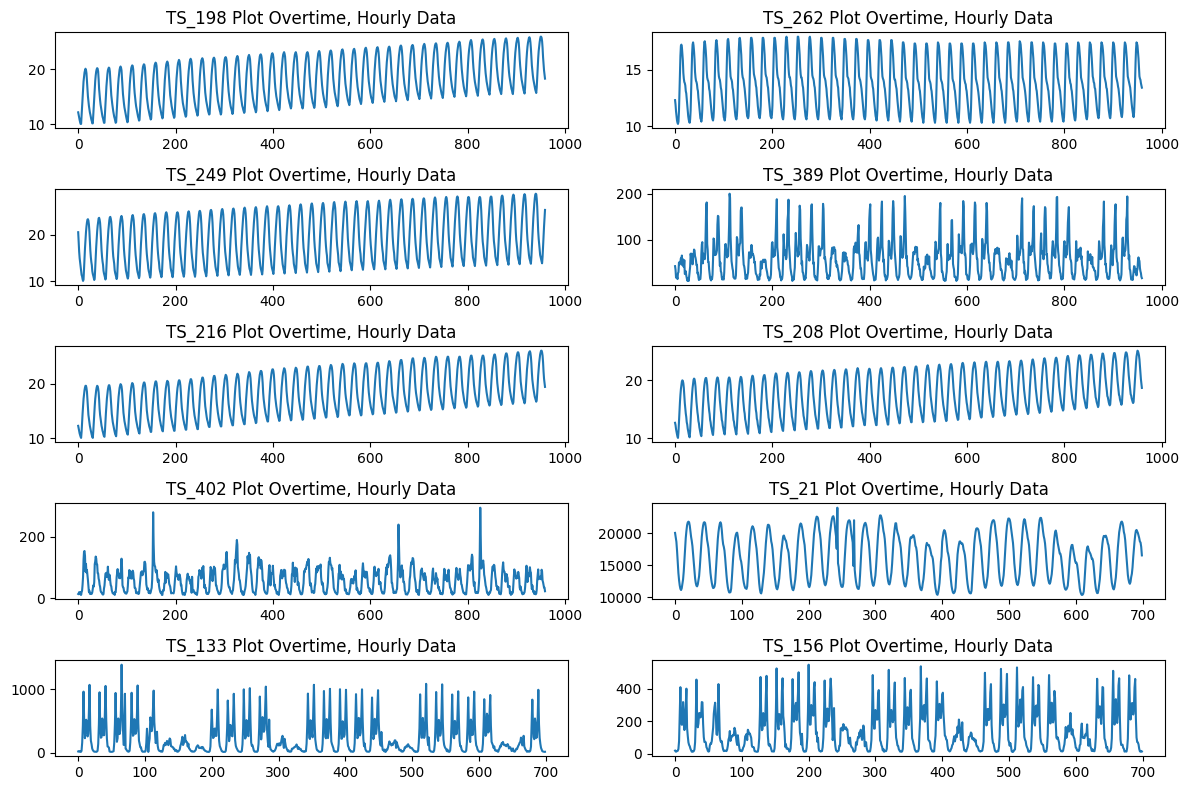

In [12]:
# generate 10 random numbers
# specify random seed
seed = 0
random.seed(seed)

# take 10 random numbers between 1 and 960
random_series = random.sample(range(1, 414+1), 10)
random_series = [f'TS_{i}' for i in random_series]
random_series

# plot random 10 data
fig, ax = plt.subplots(5,2, figsize=(12, 8))

for i, col in enumerate(random_series):
  ax[i%5, i%2].plot(df[col])
  ax[i%5, i%2].set_title(f"{col} Plot Overtime, Hourly Data")

plt.tight_layout()


It's pretty interesting that Time Series V198, V249, V216, and V208 seems to have identical pattern. And also for Time Series V133 and V156 might has identical pattern. Using this 10 Time Series samples, it seems that Time Series could have strong correlations among others.

But, this time series, despite it might has strong correlations, its seems to be challenging to predict. Because from the plot, seems the time series pattern might be different. Some have no trends, but some have, and also it has different periods of seasonality that exist.

## Plot Missing Values

Text(0.5, 1.0, 'Missing Values Plot')

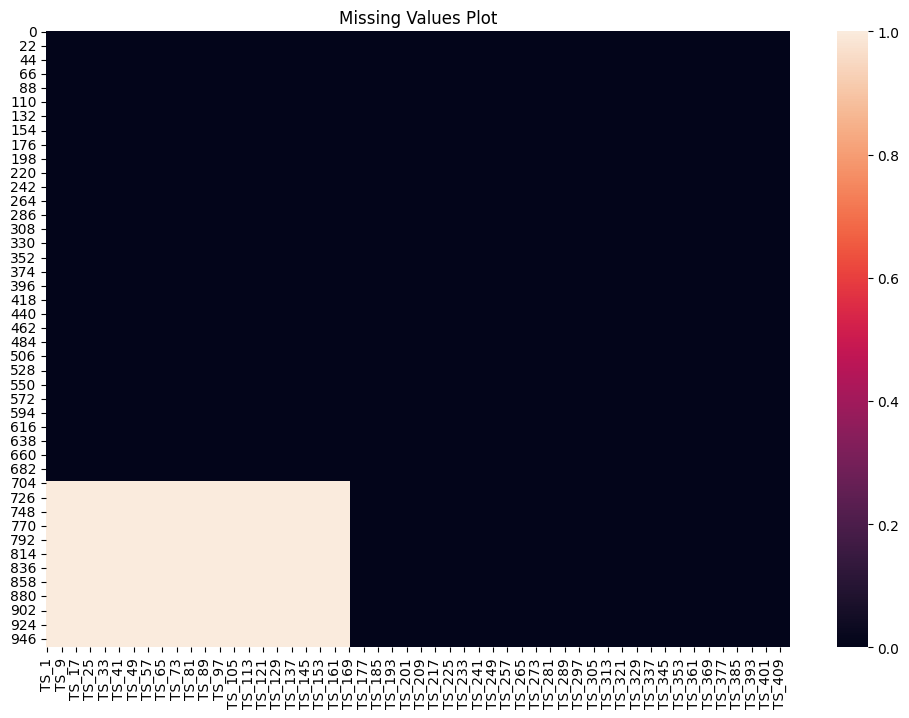

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))

# plot missing values
# white equals to has missing values
sns.heatmap(df.isna(),
            cbar = 'Greys',
            ax=ax)

plt.title("Missing Values Plot")

In [14]:
# see all time series that has missing values
df.isna().any()[df.isna().any() == True].index

Index(['TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'TS_6', 'TS_7', 'TS_8', 'TS_9',
       'TS_10',
       ...
       'TS_160', 'TS_161', 'TS_162', 'TS_163', 'TS_164', 'TS_165', 'TS_166',
       'TS_167', 'TS_168', 'TS_169'],
      dtype='object', length=169)

In [15]:
columns_not_nan = [i for i in df.columns if i not in df.isna().any()[df.isna().any() == True].index]
len(columns_not_nan)

245

**Insight:**

Time Seires TS_1 to TS_169, all have a lot of missing values. By looking at the graph, we can clearly see that almost a quarter of data is missing and has only 700 periods.

## Seasonality Plotting

### Creating Dummy Time Data

In [16]:
# defined starting date
date_start = pd.to_datetime("2017-12-28 00:00:00")

# create datetime index using pandas.date_range
datetime = pd.date_range(start = date_start,
                         periods = len(df),
                         freq = 'h')

# setting index of datetime to df
df = df.set_index(datetime)
df.head()

,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,TS_10,...,TS_405,TS_406,TS_407,TS_408,TS_409,TS_410,TS_411,TS_412,TS_413,TS_414
2017-12-28 00:00:00,605.0,3124.0,1828.0,6454.0,4263.0,5780.0,52817.0,32479.0,39455.0,513.0,...,68.0,21.0,214.0,19.0,31.0,153.0,24.0,19.0,21.0,15.0
2017-12-28 01:00:00,586.0,2990.0,1806.0,6324.0,4297.0,5497.0,51773.0,31018.0,38279.0,512.0,...,48.0,15.0,238.0,31.0,39.0,196.0,30.0,30.0,16.0,13.0
2017-12-28 02:00:00,586.0,2862.0,1897.0,6075.0,4236.0,5306.0,50907.0,30033.0,36944.0,506.0,...,33.0,15.0,130.0,25.0,22.0,163.0,22.0,12.0,17.0,13.0
2017-12-28 03:00:00,559.0,2809.0,1750.0,5949.0,4080.0,5178.0,50224.0,27716.0,35984.0,500.0,...,21.0,17.0,69.0,23.0,17.0,131.0,14.0,16.0,19.0,16.0
2017-12-28 04:00:00,511.0,2544.0,1679.0,5858.0,3883.0,5235.0,49496.0,25067.0,33721.0,490.0,...,30.0,15.0,68.0,14.0,13.0,82.0,19.0,13.0,16.0,26.0


### Plotting Preparations

In [17]:
# create function to plot seasonality

def plot_seasonality(data,
                     freq = "h"):


  # standardize values
  data = (df - np.mean(df, axis = 0)) / np.std(df, axis = 0)

  # granulate data
  if freq == "h":
    data = data.groupby(data.index.hour).mean()
    xlabel = "Hour To -"
    flag = "Hourly Plot"
  elif freq == "d":
    data = data.groupby(data.index.dayofweek).mean()
    xlabel = "Days to -"
    flag = "Daily Plot"
  else:
    print("Invalid Frequency. Valid Freq are: 'h' and 'd'")
    return

  # plot results
  fig, ax = plt.subplots(1,1, figsize=(12, 8))
  ax.plot(data, marker = "o")
  plt.grid()
  plt.title(f"{flag} Seasonality Plot")
  plt.xlabel(xlabel)
  plt.ylabel("Average Values")
  plt.show();

### Hourly Seasonality Plotting

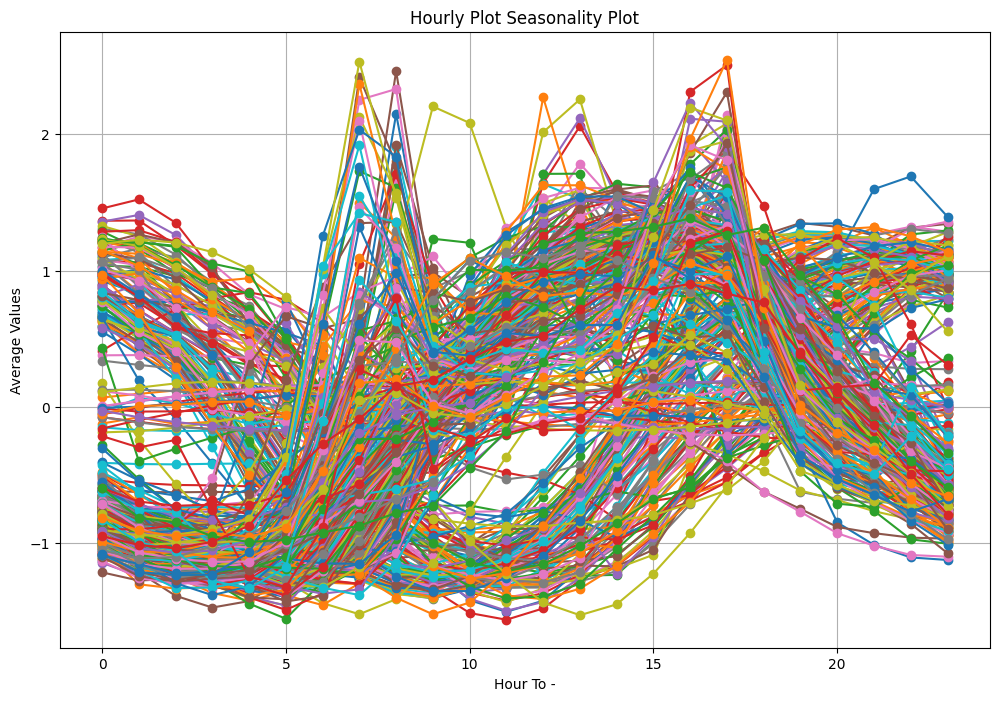

In [18]:
plot_seasonality(df);

### Daily Seasonality Plotting

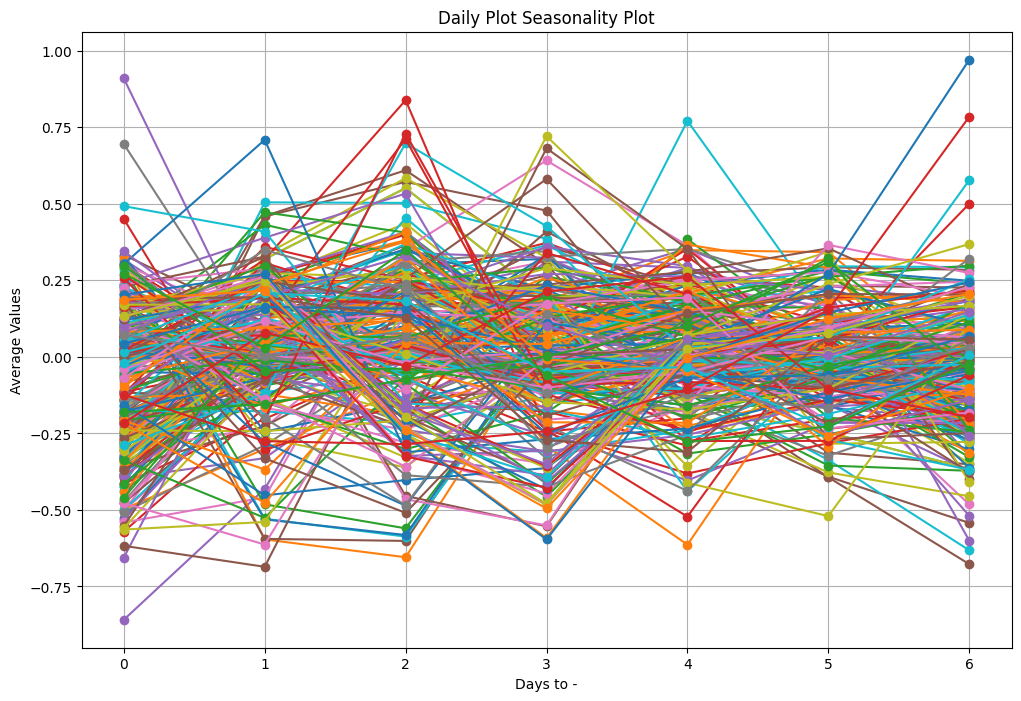

In [19]:
plot_seasonality(df, freq="d");

## Correlation Matrix Plot

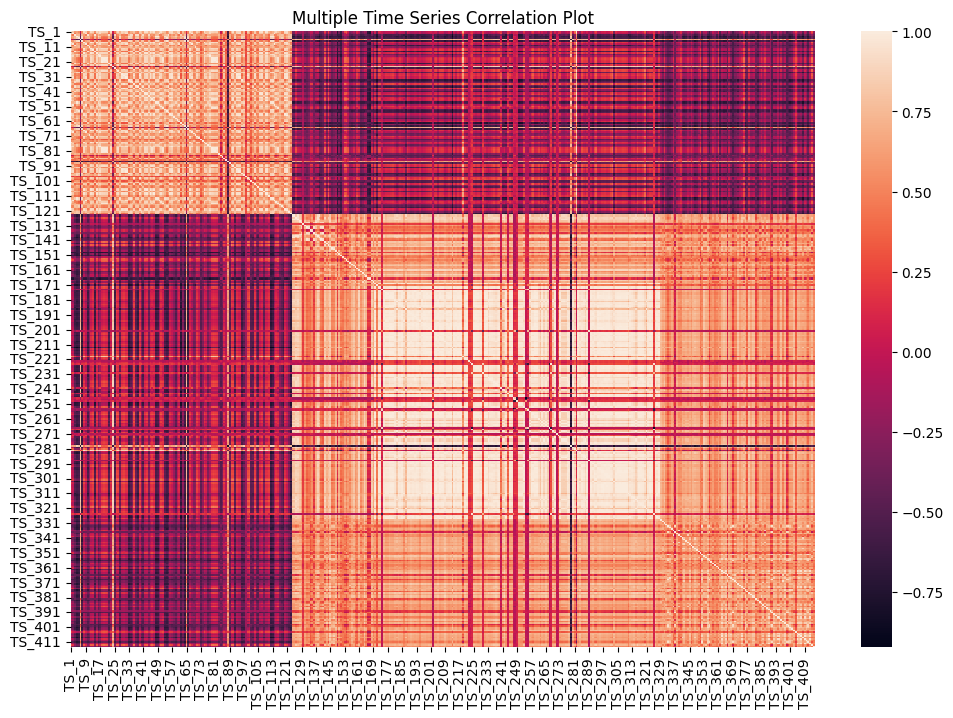

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))

sns.heatmap(df.corr(), ax=ax)

plt.title("Multiple Time Series Correlation Plot")

plt.show();

As we expect, a lot of correlation occurs from one time series to others time series from positive strong correlations to negative quite strong correations.

In [21]:
# save data with dropped index
df.to_csv("preprocessed_data.csv", index=False)